In [2]:
import numpy as np
import matplotlib.pyplot as plt

### 4.1) Thermo-physical calculations
Parameters setup

In [3]:
M = 2
init_T = 5
d_T = 5000
c_0, c_1, c_2, c_3 = 1, 2, 2, 1

Function definition

In [4]:
def u(T):
    return c_0 + c_1/2*T**2 + c_2/3*T**3 + c_3/4*T**4

Calculations

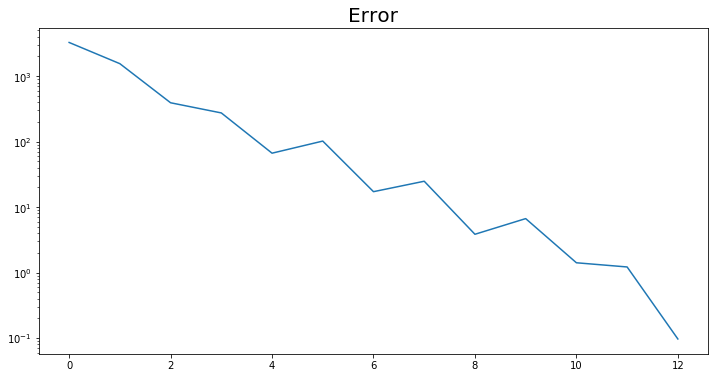

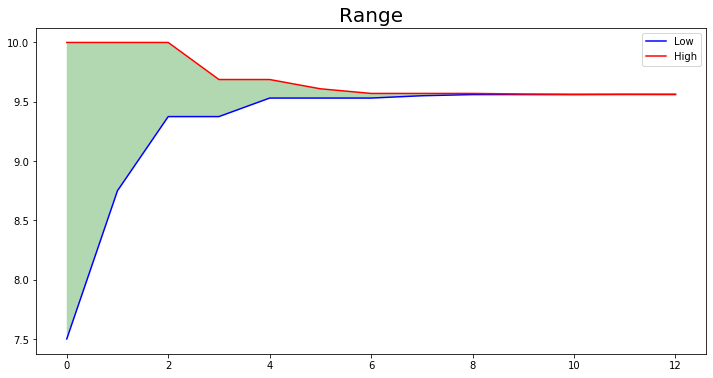

In [18]:
U1 = M*u(init_T)
U2 = U1 + d_T

Ta = init_T
Tb = init_T*2
while M*u(Tb) < U2:
    Tb = 2*Tb
Ti = (Ta + Tb)/2
Ui = M*u(Ti)
if Ui < U2:
    Ta = Ti
else:
    Tb = Ti
err = abs(U2 - Ui)
errs = [err]
Ts = [(Ta, Tb)]

while err > .1:
    Ti = (Ta + Tb)/2
    Ui = M*u(Ti)
    if Ui < U2:
        Ta = Ti
    else:
        Tb = Ti
    err = abs(U2 - Ui)
    errs.append(err)
    Ts.append((Ta, Tb))
plt.figure(figsize=(12,6))
plt.title("Error", fontsize=20)
plt.plot(errs)
plt.yscale("log")
plt.figure(figsize=(12,6))
plt.title("Range", fontsize=20)
plt.plot([i[0] for i in Ts], label="Low", color="blue")
plt.plot([i[1] for i in Ts], label="High", color="red")
plt.fill_between(range(len(Ts)), [i[0] for i in Ts], [i[1] for i in Ts], facecolor='green', alpha=0.3)
plt.legend();